In [58]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
url = "https://www.iqair.com/world-air-quality-ranking"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
}

In [60]:
response = requests.get(url, headers=headers)
print(f"Status Code: {response.status_code}")


Status Code: 200


In [61]:
if response.status_code == 200:
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    print("Webpage fetched and parsed successfully!")
else:
    print("Failed to fetch the webpage.")

Webpage fetched and parsed successfully!


In [62]:

data=[]
rows = soup.find_all("a", class_="city-label")

for row in rows:
    
    city_country =row.get_text(strip=True)
    
    city, country =city_country.split(", ")
    
    aqi = row.find_next("div", class_="aqi-number").get_text(strip=True)
    
    data.append({"City": city, "Country": country, "AQI": aqi})
    
    

In [63]:

df=pd.DataFrame(data)
    
print(df)

          City     Country  AQI
0       Lahore    Pakistan  228
1       Tehran        Iran  198
2    Chongqing       China  198
3        Delhi       India  192
4        Dhaka  Bangladesh  186
..         ...         ...  ...
118     Madrid       Spain   15
119   Canberra   Australia   14
120     Sydney   Australia   14
121  Melbourne   Australia   12
122   Montreal      Canada   12

[123 rows x 3 columns]


In [64]:
df.to_csv("real_time_aqi_data.csv" ,index=False)
print("Real-time AQI data saved to 'real_time_aqi_data.csv'")

Real-time AQI data saved to 'real_time_aqi_data.csv'


In [65]:

df=pd.read_csv("real_time_aqi_data.csv")

#checking for any missing values 

missing_values=df.isnull().sum()

print(missing_values)

#missing vallues did not find

City       0
Country    0
AQI        0
dtype: int64


In [66]:
# convert AQI data to numeric
df["AQI"]=pd.to_numeric(df["AQI"], errors="coerce")

# to drop rows missing or invalid data
df.dropna(inplace=True)

# check the datatypes 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     123 non-null    object
 1   Country  123 non-null    object
 2   AQI      123 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


In [67]:
df.head()

,City,Country,AQI
0,Lahore,Pakistan,228
1,Tehran,Iran,198
2,Chongqing,China,198
3,Delhi,India,192
4,Dhaka,Bangladesh,186


In [68]:

#add new column AQI Category
def catg_aqi(aqi):
    if aqi <=50:
        return "Good"
    elif aqi <=100:
        return "Moderate"
    elif aqi <=150:
        return "Unhealthy for  Sensetive Groups"
    elif aqi <=200:
        return "Unhealthy"
    elif aqi <=300:
        return "Very Unhealthy"
    else:
        return "Hazardous"
    
df["AQI_Category"]=df["AQI"].apply(catg_aqi)

df.head()

,City,Country,AQI,AQI_Category
0,Lahore,Pakistan,228,Very Unhealthy
1,Tehran,Iran,198,Unhealthy
2,Chongqing,China,198,Unhealthy
3,Delhi,India,192,Unhealthy
4,Dhaka,Bangladesh,186,Unhealthy


Top 10 most Polluted Cities:
         City  AQI
0     Lahore  228
2  Chongqing  198
1     Tehran  198
3      Delhi  192
4      Dhaka  186
5    Kolkata  181
6    Chengdu  167
7      Cairo  163
8   Sarajevo  158
9     Mumbai  155


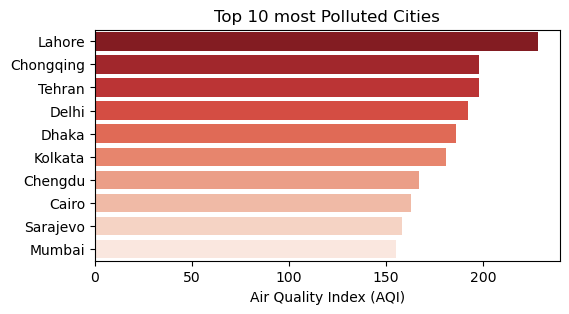



Top 10 Least Polluted Cities:
            City  AQI
122    Montreal   12
121   Melbourne   12
119    Canberra   14
120      Sydney   14
118      Madrid   15
117     Detroit   17
116    Brussels   18
115  Copenhagen   18
114      Munich   19
113   Stockholm   21


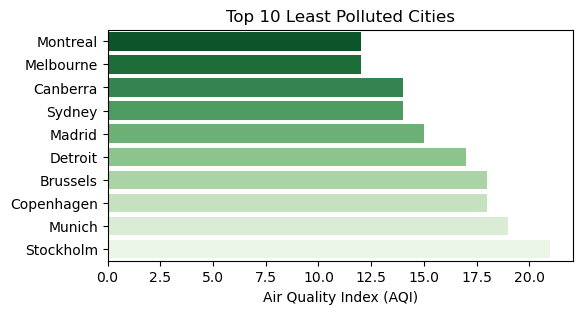

In [69]:
#top 10 most polluted cities 
top_polluted = df.sort_values("AQI",ascending=False)[["City","AQI"]].head(10)
print(f"Top 10 most Polluted Cities:\n", top_polluted)

#top 10 graph

plt.figure(figsize=(6,3))
sns.barplot(data=top_polluted, x="AQI", y="City", palette='Reds_r')
plt.title('Top 10 most Polluted Cities')
plt.xlabel("Air Quality Index (AQI)")
plt.gca().set_ylabel("")  # Remove the y-axis label
plt.show()

print("\n")

#top 10 least polluted cities
least_polluted = df.sort_values(by="AQI")[["City","AQI"]].head(10)
print(f"Top 10 Least Polluted Cities:\n", least_polluted)

#top 10 least polluted cities

plt.figure(figsize=(6,3))
sns.barplot(data=least_polluted, x='AQI', y='City',palette='Greens_r')
plt.title('Top 10 Least Polluted Cities')
plt.xlabel('Air Quality Index (AQI)')
plt.gca().set_ylabel("")  # Remove the y-axis label
plt.show()

Average AQI by Country:
 Country
Iran                  198.00
Bangladesh            186.00
India                 176.00
Pakistan              165.00
Egypt                 163.00
Bosnia Herzegovina    158.00
Uganda                152.00
Nepal                 129.00
China                 115.75
Senegal               107.00
Name: AQI, dtype: float64


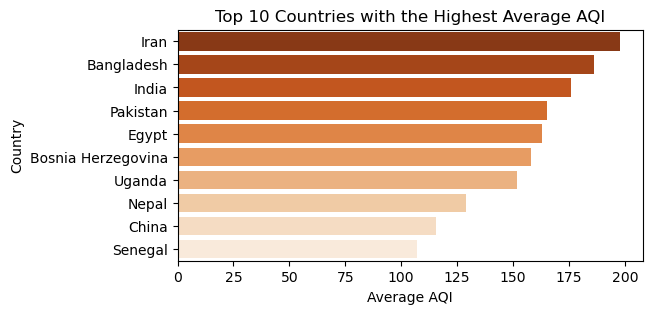

In [70]:
# Average AQI by Country

avg_aqi = df.groupby("Country")["AQI"].mean().sort_values(ascending=False)
print("Average AQI by Country:\n", avg_aqi.head(10))


# Average AQI by country
avg_aqi_by_country = df.groupby("Country")["AQI"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 3))
sns.barplot(x=avg_aqi_by_country.values, y=avg_aqi_by_country.index, palette="Oranges_r")
plt.title("Top 10 Countries with the Highest Average AQI")
plt.xlabel("Average AQI")
plt.ylabel("Country")
plt.show()


AQI Distribution:

 Moderate                           53.658537
Good                               30.081301
Unhealthy                           8.130081
Unhealthy for  Sensetive Groups     7.317073
Very Unhealthy                      0.813008
Name: AQI_Category, dtype: float64


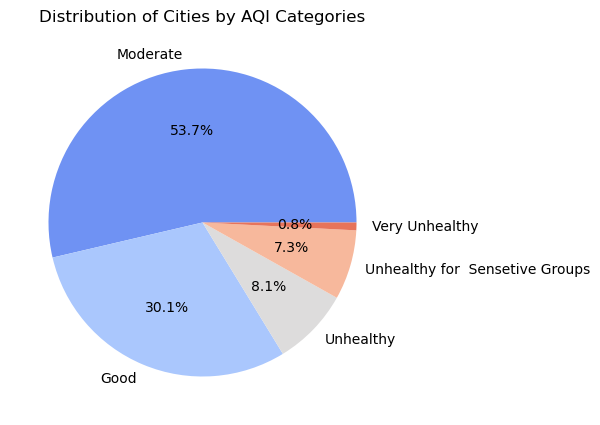

In [71]:
# percentage of cities in each AQI category

aqi_distribution = df["AQI_Category"].value_counts(normalize= True )*100

print("AQI Distribution:\n\n", aqi_distribution)

#pie chart 

plt.figure(figsize=(5,5))
colors=sns.color_palette('coolwarm', len(aqi_distribution))

aqi_distribution.plot.pie(autopct='%1.1f%%', colors= colors)
plt.title('Distribution of Cities by AQI Categories')
plt.ylabel("") 
plt.show()
